# Proceso Poisson

Un Proceso de Poisson de tasa $\lambda$ es un proceso de conteo $\{N_t\}_{t\geq 0}$ donde para cada $t \geq 0$, se tiene que $N_t \sim Poi(\lambda t)$. Usando algunos resultados teóricos veremos dos maneras de simular un Proceso Poisson.


1. Simulación de Procesos Escalonados

Veamos cómo graficar funciones escalonadas en Python donde el escalón es punteado. Para esto, usaremos un ciclo para graficar cada escalón.

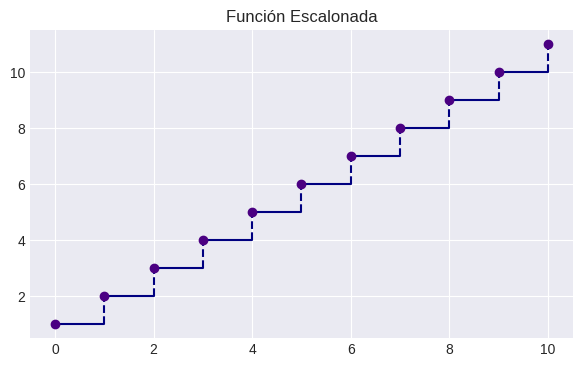

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

llegadas = np.linspace(0, 10, 11) # Saltos
conteo = np.arange(1, len(llegadas) + 1) # Valor de la función

plt.figure(figsize=(7, 4))

# Dibujamos las líneas para la trayectoria
for i in range(len(llegadas) - 1):
    # Línea horizontal
    plt.plot([llegadas[i], llegadas[i+1]], [conteo[i], conteo[i]], color='navy')

    # Línea vertical punteada
    plt.plot([llegadas[i+1], llegadas[i+1]], [conteo[i], conteo[i+1]],  # Mantenemos fija a la x y movemos y
             color='navy', linestyle='--')

# Puntos para indicar el salto
plt.scatter(llegadas, conteo, color='indigo', zorder=3)

plt.title('Función Escalonada')
plt.grid()
plt.show()



Ahora recordemos algunos resultados teóricos que nos ayudarán a simular un Proceso Poisson

2. Simulación por número de ocurrencias

Recordemos que si $n \in \mathbb{N}$ y $S_1, S_2, ..., S_n$ son los tiempos de ocurrencia de un Proceso Poisson de tasa $\lambda$, entonces

$$ (S_1, S_2, ..., S_n) |_{N_t = n} \overset{D}{=} (U_{(1)}, U_{(2)}, ..., U_{(n)})$$

donde $U_1, U_2, ..., U_n \sim U(0,t)$ y $U_{(1)}, U_{(2)}, ..., U_{(n)}$ son sus estadísticos de orden.

**Idea para simular un Proceso Poisson sabiendo el número de ocurrencias**

Dado $n \in \mathbb{N}$ y $t \geq 0$, nuestro objetivo es simular $\{u_1, ..., u_n\} \subseteq (0,t)$, los cuales serán los tiempos de ocurrencia de nuestro proceso.

1. Simulamos $U_1, U_2, ..., U_n \sim U(0,t)$.
2. Para cada $k \in \mathbb{N}$, el proceso tendrá un salto en $U_{(k)}$.

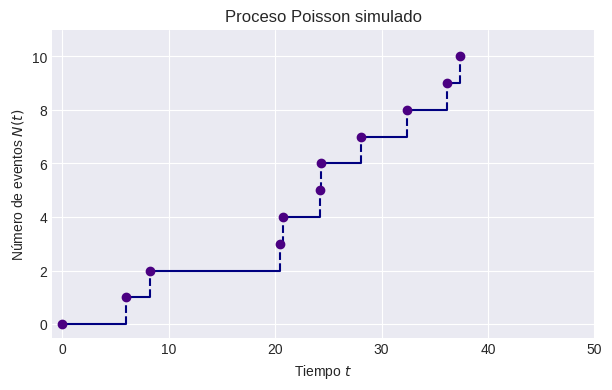

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# Definimos el tiempo t y el número de saltos n
t = 50
n = 10

# Generamos n uniformes en el intervalo (0,t) y las ordenamos
uniformes = np.random.uniform(0, t, n)
uniformes.sort()

# Creamos un data.frame para los tiempos de recurrencia
pp1 = pd.DataFrame({'n':range(n+1), 'T_n':np.concatenate([[0],uniformes])}) # Agregamos 0 con 0

# Graficamos con las funciones step y scatter
plt.figure(figsize=(7,4))
plt.style.use('seaborn-v0_8-dark')
# Algo análogo a lo anterior
for i in range(len(pp1['T_n']) - 1):
    # Línea horizontal
    plt.plot([pp1['T_n'][i], pp1['T_n'][i+1]], [pp1['n'][i], pp1['n'][i]], color='navy')

    # Línea vertical punteada
    plt.plot([pp1['T_n'][i+1], pp1['T_n'][i+1]], [pp1['n'][i], pp1['n'][i+1]],  # Mantenemos fija a la x y movemos y
             color='navy', linestyle='--')
plt.scatter(pp1['T_n'], pp1['n'], color='indigo', zorder=3)
plt.plot()
plt.title('Proceso Poisson simulado')
plt.xlabel('Tiempo $t$')
plt.ylabel('Número de eventos $N(t)$')
plt.xlim(-1, t)
plt.ylim(-0.5,n+1)
plt.grid()
plt.show()

Este proceso fue construido solo sabiendo el número de saltos que daba el proceso hasta cierto tiempo, pero ¿de qué tasa es el proceso?

Recordemos que la tasa $\lambda$ representa la media del número de ocurrencias en una unidad de tiempo, entonces notando que $\mathbb{E}(N_t) = \lambda t = n$ y despejando lambda obtenemos que $\lambda = \frac{n}{t}$, por lo que nuestro proceso fue de parámetro $\frac{n}{t}$

Es decir que para simular un proceso Poisso de tasa $\lambda$, basta con repetir el procedimiento anterior haciendo que $\frac{n}{t}$ = $\lambda$, y escalando esta fracción conforme querramos que el proceso sea más extenso.

**Ejemplo**

Si queremos simular un Proceso Poisson con $\lambda = 5$, entonces podemos fijar $t = 1$ y $n = 5$, o bien $t = 10$ y $n = 50$, en ambos se cumple que $\frac{n}{t} = \lambda$ pero en el segundo caso obtenemos una trayectoria más larga (en términos del tiempo) del proceso.

Definiremos una clase llamada $\texttt{ProcesoPoisson_Ocurrencias}$ para guardar una función que simula el proceso de esta forma.

In [ ]:
# Recibe el intervalo de tiempo y el número de saltos hasta ese intervalo
class ProcesoPoisson_Ocurrencias:
  def __init__(self, t, n):
    self.t = t
    self.n = n
    self.saltos = pd.DataFrame()

  # Simulamos como antes y lo agregamos a un data frame
  def simular(self):
    uniformes = np.random.uniform(0, self.t, self.n)
    uniformes.sort()
    self.saltos = pd.DataFrame({'n':range(self.n+1), 'T_n':np.concatenate([[0],uniformes])})
    return self.saltos

  # Graficamos igual que antes
  def plot(self):
    plt.figure(figsize=(7,4))
    plt.style.use('seaborn-v0_8-dark')
    for i in range(len(self.saltos['T_n']) - 1):
        # Línea horizontal
        plt.plot([self.saltos['T_n'][i], self.saltos['T_n'][i+1]], [self.saltos['n'][i], self.saltos['n'][i]], color='navy')

        # Línea vertical punteada
        plt.plot([self.saltos['T_n'][i+1], self.saltos['T_n'][i+1]], [self.saltos['n'][i], self.saltos['n'][i+1]],  # Mantenemos fija a la x y movemos y
                color='navy', linestyle='--')
    plt.scatter(self.saltos['T_n'], self.saltos['n'], color='indigo', zorder=3)
    plt.scatter(self.saltos['T_n'], self.saltos['n'], color='blue', zorder=1, s=15)
    plt.title('Proceso Poisson simulado')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.grid()
    plt.show()

Ahora veamos qué pasa cuando $t=1$ y $n=5$

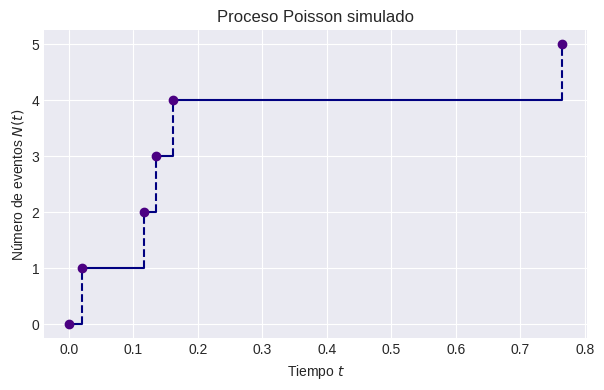

In [ ]:
ppt1n5 = ProcesoPoisson_Ocurrencias(1, 5)
ppt1n5.simular()
ppt1n5.plot()

Ahora cuando $t=10$ y $n=50$

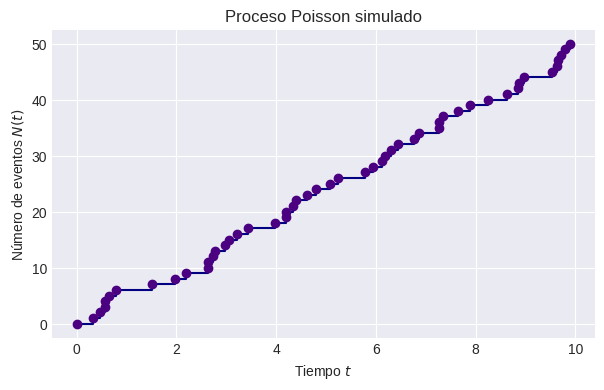

In [ ]:
ppt10n50 = ProcesoPoisson_Ocurrencias(10, 50)
ppt10n50.simular()
ppt10n50.plot()

3. Simulación por tiempos de interocurrencia

Recordemos que si $T_1, T_2, ...$ son los tiempos de interocurrencia de un proceso Poisson, entonces para cada $i \in \mathbb{N}$, se cumple que $T_i \sim exp(\lambda)$. Además, una manera alternativa de definir al proceso es:

$$ N(t) = sup\{n>0 : \sum_{i=0}^n T_i \leq t\} $$

**Pseudocódigo para simular un Proceso Poisson usando tiempos de interocurrencia**

El objetivo es generar una colección de tiempos de interocurrencia del proceso para un intervalo $[0,t]$. Es decir, queremos una colección $\{t_1, t_2, ..., t_N\} \subseteq (0, \infty)$ donde $N \in \mathbb{N}$ lo encontraremos en la simulación.

1. Generamos $t_1 \sim exp(\lambda)$
2. Para cada $i$, $t_{i+1} = t_i + exp(\lambda)$
3. Si $t_i > t$, terminamos. Si no, volvemos al paso 2.

Observa que el mayor $N \in \mathbb{N}$ tal que $t_N \leq t$ corresponde al número de tiempos de interocurrencia.

20 [0, 0.16742842298589986, 1.5146932296660363, 1.820288136849122, 2.58329869634978, 2.59798091706648, 5.108168552130703, 7.417927859539296, 7.451920547395006, 10.597298178087218, 10.7448813462243, 11.078716756470895, 12.01033227626, 14.896764254245962, 16.81228952271079, 16.814551312147685, 17.551077978197316, 18.354124031115596, 19.01844552015752, 20.4800418450022]


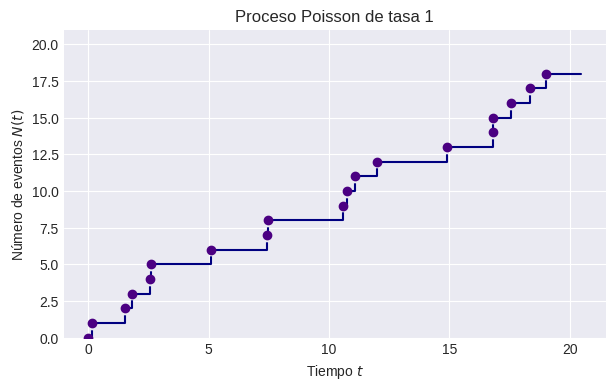

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Definimos el tiempo hasta el cual queremos nuestro proceso
t = 20

# Definimos la tasa del proceso
lamb = 1

# Definimos una lista de llegadas y la suma
llegadas = [0]

# Mientras la suma sea menor que t, seguimos generando exponenciales
while llegadas[-1] < t:
  ti = np.random.exponential(1/lamb)
  llegadas.append(llegadas[-1] + ti)

# N será el número de llegadas
N = len(llegadas)

# Imprimimos el número de llegadas y las llegadas
print(N, llegadas)

# Graficamos nuestro proceso
plt.figure(figsize=(7,4))
plt.style.use('seaborn-v0_8-dark')
# Algo análogo a lo anterior
# ...
niveles = list(range(len(llegadas) - 1))
for i in range(len(llegadas)-1):
    # Línea horizontal
    plt.plot([llegadas[i], llegadas[i+1]], [niveles[i], niveles[i]], color='navy')

    # Línea vertical punteada (si no es la última)
    if i < len(niveles) - 1:
        plt.plot([llegadas[i+1], llegadas[i+1]], [niveles[i], niveles[i+1]], color='navy', linestyle='--')

plt.scatter(llegadas[:-1], niveles, color='indigo', zorder=3)
plt.title(f'Proceso Poisson de tasa {lamb}')
plt.xlabel('Tiempo $t$')
plt.ylabel('Número de eventos $N(t)$')
plt.ylim(0,N+1)
plt.grid()


Observa que el proceso no termina en $t=20$, esto se debe a que la condición de paro del $\texttt{while}$ es pasar la t, y eso se da en la última iteración, de la cual el último tiempo de llegada muy seguramente rebase al 20.

Por último, definiremos una clase llamada $\texttt{ProcesoPoisson}$ que recibirá como parámetro a $\lambda$ y podrá generar una trayectoria de un Proceso Poisson de dicha tasa

In [ ]:
class ProcesoPoisson:
  # Recibe la tasa lambda
  def __init__(self, lamb):
    self.lamb = lamb
    self.proceso = pd.DataFrame()

  # Recibe un parámetro t y simulamos hasta ese tiempo
  def simular(self, t):
    llegadas = [0]
    # Mientras la suma no exceda t, genera una exponencial y la agrega a la lista
    while llegadas[-1] < t:
      ti = np.random.exponential(1/self.lamb)
      llegadas.append(llegadas[-1] + ti)
    # N es tal que N_t = N
    N = len(llegadas)
    self.proceso = pd.DataFrame({'n':range(N), 'T_n':llegadas})
    print(f'El proceso tiene {N} salto al tiempo {t}')
    return self.proceso

  # Graficamos el proceso igual que antes
  def plot(self):
    plt.figure(figsize=(7,4))
    for i in range(len(self.proceso['T_n'])-1):
        # Línea horizontal
        plt.plot([self.proceso['T_n'][i], self.proceso['T_n'][i+1]], [self.proceso['n'][i], self.proceso['n'][i]], color='navy')

        # Línea vertical punteada (si no es la última)
        if i < len(self.proceso['n']) - 1:
            plt.plot([self.proceso['T_n'][i+1], self.proceso['T_n'][i+1]], [self.proceso['n'][i], self.proceso['n'][i+1]], color='navy', linestyle='--')

    plt.scatter(self.proceso['T_n'], self.proceso['n'], color='indigo', zorder=3)
    plt.title(f'Proceso Poisson de tasa {self.lamb}')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.grid()

Ahora probaremos con simular un Proceso Poisson de tasa $\lambda = 5$ hasta el tiempo 314

El proceso tiene 10 salto al tiempo 10


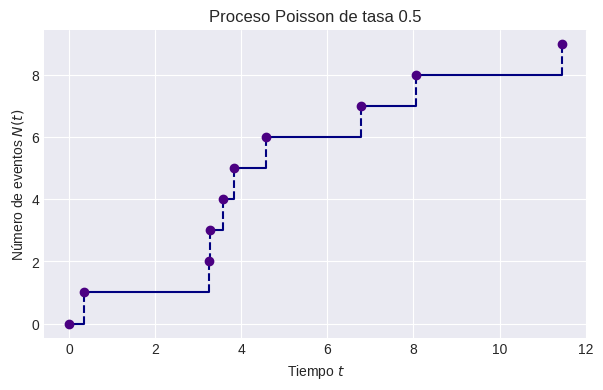

In [ ]:
ppprueba = ProcesoPoisson(0.5)
ppprueba.simular(10)
ppprueba.plot()